# Entertainment Title

# Setting Up Necessary Things

In [ ]:
# Jupyter Notebook Magic Command - Auto Reloading
%reload_ext autoreload
%autoreload 2

# Jupyter Notebook Magic Command - Inline Plotting
%matplotlib inline

In [ ]:
# Ignore All Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Check GPU Status
!nvidia-smi

Wed Sep 13 16:42:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/All Entertainment Classification

/content/drive/MyDrive/All Entertainment Classification


# Necessary Imports

In [ ]:
# Installs
! pip install -q transformers sentencepiece fastbook fastai ohmeow-blurr nbdev bert-score

In [ ]:
# Imports
import pandas as pd

import torch
from transformers import AutoModel, T5ForConditionalGeneration, AutoModelForSeq2SeqLM
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

# Data Cleaning

In [ ]:
# Load Data Into DataFrame
df = pd.read_csv("data/processed/title/title_generation.csv")
df.head()

,title,description,genres,category
0,Season of Blood: A Rwandan Journey,"When President Habyarimana’s jet was shot down in April 1994, Rwanda erupted into a hundred-day orgy of killing – which left up to a million dead. Fergal Keane travelled through the country as the genocide was continuing, and his powerful analysis reveals the terrible truth behind the headlines.‘A tender, angry account … As well as being a scathing indictment – Keane says the genocide inflicted on the Tutsis was planned well in advance by Hutu leaders – this is a graphic view of news-gathering in extremis. It deserves to become a classic’ Independent.","Nonfiction, Cultural, Africa, History, Eastern Africa, Rwanda, War",book
1,Echo Burning,"Hitching rides is an unreliable mode of transport. In temperatures of over a hundred degrees, you’re lucky if a driver will open the door of his air-conditioned car long enough to let you slide in. That’s Jack Reacher’s conclusion. He’s adrift in the fearsome heat of a Texas summer, and he needs to keep moving through the wide open vastness, like a shark in the water. The last thing he’s worried about is exactly who picks him up.He never expected it to be somebody like Carmen. She’s alone, driving a Cadillac. She’s beautiful, young and rich. She has a little girl who is being watched by un...","Thriller, Fiction, Mystery, Mystery, Crime",book
2,Cells at Work Special,"For the regular cells of the human body, life consists of countless repetitive tasks. They spend every day multiplying, leaving little time for other activities. But one day, this monotony is abruptly interrupted by a cell with an odd-looking hat. Tired of unending drudgery, another cell named Ippan Saibou decides to join this quirky stranger for a day of pranks, jokes, and mischief.",Comedy,anime
3,Make Your Move,A pair of star-crossed dancers in New York find themselves at the center of a bitter rivalry between their brothers' underground dance clubs.,"Drama, Musical, Romance",movie
4,Guilty Parade,"Guilty Parade is an interactive Visual Novel with Point &amp; Click elements. The full game consists of five episodes. The first one is presented in the free demo version (3+ hours of play). Currently, there are three episodes released (about 13-15 hours of play). Episodes 3-5 will be out as paid DLCs. You wake up in a completely unfamiliar place without any memories of yourself surrounded by hostile soldiers. What is that like? The male protagonist gets a nickname Nemo and is forced to investigate a cruel crime in exchange for the Commander’s patronage. To solve the case, he joins the eli...",Adventure,game


In [ ]:
# Size of DataFrame
df.shape

(24877, 4)

In [ ]:
df.drop(["genres", "category"], axis = 1, inplace = True)

In [ ]:
df.head()

,title,description
0,Season of Blood: A Rwandan Journey,"When President Habyarimana’s jet was shot down in April 1994, Rwanda erupted into a hundred-day orgy of killing – which left up to a million dead. Fergal Keane travelled through the country as the genocide was continuing, and his powerful analysis reveals the terrible truth behind the headlines.‘A tender, angry account … As well as being a scathing indictment – Keane says the genocide inflicted on the Tutsis was planned well in advance by Hutu leaders – this is a graphic view of news-gathering in extremis. It deserves to become a classic’ Independent."
1,Echo Burning,"Hitching rides is an unreliable mode of transport. In temperatures of over a hundred degrees, you’re lucky if a driver will open the door of his air-conditioned car long enough to let you slide in. That’s Jack Reacher’s conclusion. He’s adrift in the fearsome heat of a Texas summer, and he needs to keep moving through the wide open vastness, like a shark in the water. The last thing he’s worried about is exactly who picks him up.He never expected it to be somebody like Carmen. She’s alone, driving a Cadillac. She’s beautiful, young and rich. She has a little girl who is being watched by un..."
2,Cells at Work Special,"For the regular cells of the human body, life consists of countless repetitive tasks. They spend every day multiplying, leaving little time for other activities. But one day, this monotony is abruptly interrupted by a cell with an odd-looking hat. Tired of unending drudgery, another cell named Ippan Saibou decides to join this quirky stranger for a day of pranks, jokes, and mischief."
3,Make Your Move,A pair of star-crossed dancers in New York find themselves at the center of a bitter rivalry between their brothers' underground dance clubs.
4,Guilty Parade,"Guilty Parade is an interactive Visual Novel with Point &amp; Click elements. The full game consists of five episodes. The first one is presented in the free demo version (3+ hours of play). Currently, there are three episodes released (about 13-15 hours of play). Episodes 3-5 will be out as paid DLCs. You wake up in a completely unfamiliar place without any memories of yourself surrounded by hostile soldiers. What is that like? The male protagonist gets a nickname Nemo and is forced to investigate a cruel crime in exchange for the Commander’s patronage. To solve the case, he joins the eli..."


In [ ]:
df.isna().sum()

title          0
description    0
dtype: int64

In [ ]:
# Description of The DataFrame
df.describe(include="object")

,title,description
count,24877,24877
unique,24877,24877
top,Season of Blood: A Rwandan Journey,"When President Habyarimana’s jet was shot down in April 1994, Rwanda erupted into a hundred-day orgy of killing – which left up to a million dead. Fergal Keane travelled through the country as the genocide was continuing, and his powerful analysis reveals the terrible truth behind the headlines.‘A tender, angry account … As well as being a scathing indictment – Keane says the genocide inflicted on the Tutsis was planned well in advance by Hutu leaders – this is a graphic view of news-gathering in extremis. It deserves to become a classic’ Independent."
freq,1,1


# Data-Loaders and Modeling

In [ ]:
model_name = "fabiochiu/t5-small-medium-title-generation"

In [ ]:
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=AutoModelForSeq2SeqLM)

In [ ]:
hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

('t5',
 transformers.models.t5.configuration_t5.T5Config,
 transformers.models.t5.tokenization_t5_fast.T5TokenizerFast,
 transformers.models.t5.modeling_t5.T5ForConditionalGeneration)

In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model)

In [ ]:
text_gen_kwargs

{}

In [ ]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

In [ ]:
blocks = (
    Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm),
    Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm)
)


dblock = DataBlock(
    blocks=blocks,
    get_x=ColReader("description"),
    get_y=ColReader("title"),
    splitter=RandomSplitter(valid_pct=0.1, seed=42)
)

In [ ]:
dls = dblock.dataloaders(df, bs=2)

torch.save(dls, "dataloaders/dls-entertainment-title.pkl")

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,"Antigone Sophocles 442 BC ________________________________________ Translator's Note This translation by Ian Johnston of Malaspina University-College, Nanaimo, BC, has certain copyright restrictions. The translator would like to acknowledge the extremely valuable help provided by Andrew Brown’s edition of Sophocles’ Antigone (Aris & Philips, 1987), especially by his editorial notes. This text was last revised in May 2005. ________________________________________ Dramatis Personae ANTIGONE: daughter of Oedipus. ISMENE: daughter of Oedipus, sister of Antigone CREON: king of Thebes EURYDICE: wife of Creon HAEMON: son of Creon and Euridice, engaged to Antigone. TEIRESIAS: an old blind prophet BOY: a young lad guiding Teiresias GUARD: a soldier serving Creon. MESSENGER CHORUS LEADER: Theban Elders ATTENDANTS/CHORUS [In Thebes, directly in front of the royal palace, which stands in</s>",History Love mix
1,"Report on Black People Executed without Trial by Police, Security Guards and Self-Appointed Law Enforcers January 1 - June 30, 2012. Malcolm X Grassroots Movement (MXGM) Updated July 16, 2012 This report was produced for the “No More Trayvon Martins Campaign”, demanding a National Plan of Action for Racial Justice. This is the 2nd Major report of the Campaign. A human rights crisis confronts Black people in the United States. Since January 1, 2012, police and a much smaller number of security guards and self-appointed vigilantes have murdered at least 120 Black women and men. These killings are definitely not accidental or random acts of violence or the work of rogue cops. As we noted in our April 6th, 2012 “Trayvon Martin is All of Us!"" Report (see http://mxgm.org/trayvon-martin-is-all-of-us/), the use of deadly force against Black people is standard practice in the United States, and woven into to the very fabric of the society. The corporate media have given very little attention to these extrajudicial killings. We call</s>",Eat My Ass


In [ ]:
seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },
            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },
            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
model = BaseModelWrapper(hf_model)
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

learner = Learner(dls,
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

# Model Training

## Stage - 0

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.002511886414140463, valley=0.0020892962347716093)

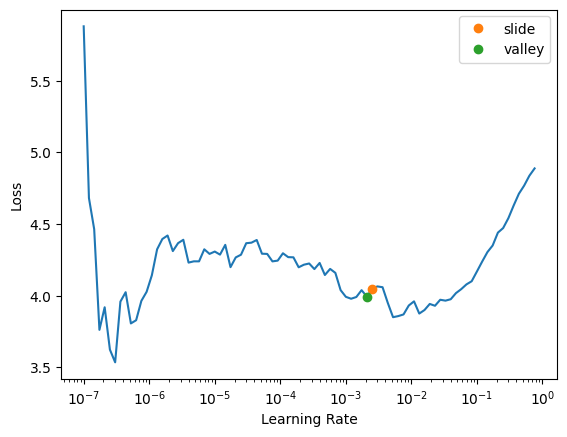

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(1, 2.25e-3)

epoch,train_loss,valid_loss,time


epoch,train_loss,valid_loss,time
0,3.128220,3.263796,37:38


In [ ]:
learner.save("entertainment-title-stage-0")

Path('models/entertainment-title-stage-0.pth')

In [ ]:
learner.show_results(learner=learner, max_n=1)

,text,target,prediction
0,"Calvin Coolidge XXX President of the United States: 1923-1929 Fifth Annual Message December 6, 1927 Members of the Congress: It is gratifying to report that for the fourth consecutive year the state of the Union in general is good. We are at peace. The country as a whole has had a prosperity never exceeded. Wages are at their highest range, employment is plentiful. Some parts of agriculture and industry have lagged; some localities have suffered from storm and flood. But such losses have been absorbed without serious detriment to our great economic structure. Stocks of goods are moderate and a wholesome caution is prevalent. Rates of interest for industry, agriculture, and government have been reduced. Savers and investors are providing capital for new construction in industry and public works. The purchasing power of agriculture has increased. If the people maintain that confidence which they are entitled to have in themselves, in each other, and in America, a comfortable prosperity will continue. CONSTRUCTIVE ECONOMY Without constructive economy in Government expenditures we should not now be enjoying these results or these prospects. Because we are not now physically at war, some people are disposed to forget that our war",Sexy Trash,"[The Greatest State of the United States, The Temptary]"


In [ ]:
test_description = "When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."

In [ ]:
outputs = learner.blurr_summarize(test_description, early_stopping=True, num_beams=4, num_return_sequences=3)
list(outputs[0].values())[0]

['The Joker', 'Batman: The Joker', "Batman's Joker"]

## Stage - 1

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0020892962347716093, valley=0.004365158267319202)

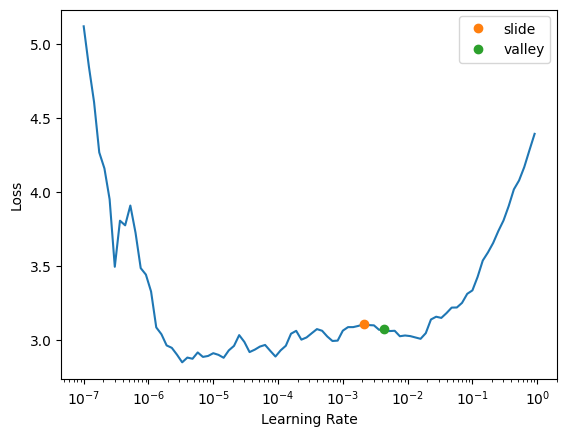

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(3,slice(1.75e-3, 4.5e-3))

epoch,train_loss,valid_loss,time
0,4.152092,3.793839,48:08
1,3.701065,3.483872,50:34


epoch,train_loss,valid_loss,time
0,4.152092,3.793839,48:08
1,3.701065,3.483872,50:34
2,3.109429,3.366842,51:59


In [ ]:
learner.save("entertainment-title-stage-1")

Path('models/entertainment-title-stage-1.pth')

In [ ]:
learner.export("models/entertainment-title-stage-1.pkl")

In [ ]:
test_description = "When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."

In [ ]:
outputs = learner.blurr_summarize(test_description, early_stopping=True, num_beams=4, num_return_sequences=3)
list(outputs[0].values())[0]

['Batman: The Movie', 'Batman: The Joker', 'Batman: Batman']